# POTATO PRICE TRAIN

<img src="potato.jpg">

# Important module and library

In [3]:
#Important module and library  to run the program 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset

In [16]:
df = pd.read_csv("PotatoPrice.csv") #df for dataframe,read the data from the csv data file
df


,KG,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55
5,6,75
6,7,90
7,8,100
8,9,115
9,10,120


# Visualization data in graphical representation

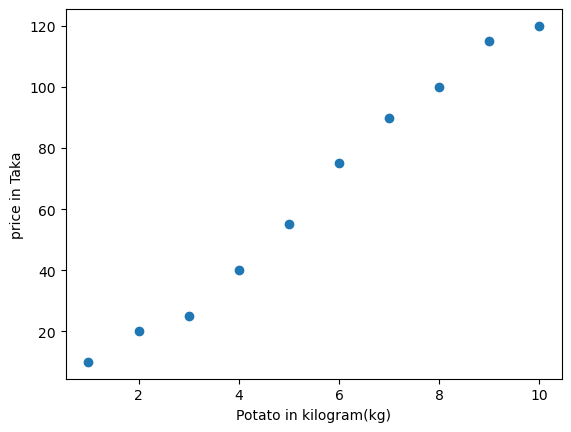

In [24]:
# For the data visualization 
%matplotlib inline
plt.xlabel('Potato in kilogram(kg)')
plt.ylabel('price in Taka')
plt.scatter(df.KG, df.price)
plt.show()

In [26]:
X = df[['KG']] #since x have to be two dimentional or 2D array. So [[]]

In [27]:
y = df['price']

# Split Dataset for Train and Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10) 
#if you use "random_state=10" then the smaple will be same all the time


In [29]:
X_train

,KG
4,5
5,6
9,10
1,2
7,8
8,9
6,7
2,3


In [30]:
X_test

,KG
3,4
0,1


In [31]:
y_train

4     55
5     75
9    120
1     20
7    100
8    115
6     90
2     25
Name: price, dtype: int64

In [32]:
y_test

3    40
0    10
Name: price, dtype: int64

# Train dataset using model

In [33]:
# use the regression model for the dataset
reg=LinearRegression() #creat the object for the regression
reg.fit(X_train, y_train)  #pass the data through the model, reg.fit(1st argument, 2nd argument);
            #1st argument have to be two dimentional or 2D array
            #2nd argument have to be y axis or the output, since y=mx+c

LinearRegression()

# Predict

In [36]:
reg.predict(X_test)

array([44.39189189,  3.58108108])

In [37]:
y_test

3    40
0    10
Name: price, dtype: int64

# Accuracy of The Model

In [39]:
#We will find the accuracy of this model(our model was liner regression model) for our dataset
reg.score(X_test, y_test)
plt.show()

# predict the output manually 

In [40]:
# Give any unknown potato kilogram value,to know the price
#(N.B: the potato kilogram value have to be any value upto 1,for the decent prediction. Since our fitted data potato_kg range is 1 to 7)
reg.predict([[1.15095659]]) 

/home/samiun/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.63463469])

# Take user input to know the potato price

In [53]:
# Simple user interface to run our model

# Take user input for the weight of potatoes
x = input('To know the potato price, enter the potato weight (in kilograms): ')

# Convert the input to a float value
x = float(x)

# Reshape the input into a 2D array (1 feature, 1 sample)
fvalu_2D = np.array([[x]])

# Assuming reg is the trained model (replace reg with your actual model object)
my_prediction = reg.predict(fvalu_2D)

# Convert the prediction (array) into a scalar
price = my_prediction.item()

# Print the result
print(f'So, {x} kilograms of potatoes price is = {price} Taka')


So, 5.0 kilograms of potatoes price is = 57.995495495495504 Taka


/home/samiun/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   KG  price
0   1     10
1   2     20
2   3     25
3   4     40
4   5     55
5   6     75
6   7     90
7   8    100
8   9    115
9  10    120


/home/samiun/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


So, 10.0 kilograms of potatoes price is = 112.40 Taka
Mean Absolute Error: 7.18


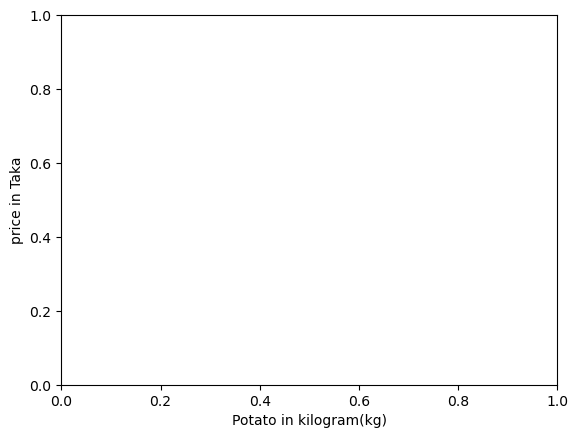

In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Example Data (replace this with your actual dataset)
data = {
    'weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Potato weights in kilograms
    'price': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Potato prices in Taka
}
df = pd.read_csv("PotatoPrice.csv")
print(df)

# Features and target variable
X = df[['KG']]  # Features (weight of potatoes)
y = df['price']  # Target (price of potatoes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# Make a prediction
x_input = float(input('To know the potato price, enter the potato weight (in kilograms): '))
x_input_scaled = scaler.transform([[x_input]])  # Scale the input before prediction
predicted_price = reg.predict(x_input_scaled)

# Output the prediction
print(f'So, {x_input} kilograms of potatoes price is = {predicted_price[0]:.2f} Taka')

# Model evaluation
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

